# Predicting Food Delivery Time Using Machine Learning

## Phase 2: Statistical Modelling

## Table of Contents

* [Introduction](#Introduction)
* [One hot Encoding and Label Encoding](#One-hot-Encoding-and-Label-Encoding)
* [Feature Selection](#Feature-Selection)
* [Model Fitting & Tuning](#Model-Fitting-&-Tuning)
* [Neural Network Model Fitting & Tuning](#Neural-Network-Model-Fitting-&-Tuning)
* [Model Comparison](#Model-Comparison)
* [Critique and Limitations](#Critique-and-Limitations)
* [Summary and Conclusions](#Summary-and-Conclusions)


## Introduction

## Phase 1 Summary

Phase 1 of this project focused on preparing the raw data for predictive modeling by conducting a thorough process of data cleaning, preprocessing, feature engineering, outlier detection, and sampling. The original dataset contained 45,584 rows and 20 columns, capturing a wide variety of delivery-related attributes, including timestamps, geolocation, weather, traffic conditions, vehicle and delivery person information.

First, irrelevant columns such as ID, Delivery_person_ID, Order_Date, Time_Ordered, and Time_Order_Picked were removed as they did not contribute meaningful predictive value or were redundant due to later feature engineering steps. Following this, rows with missing values were identified and removed to ensure consistency and data integrity.

A critical step in feature engineering involved calculating a new variable, Haversine_Distance_km, using the geographical coordinates of the restaurant and delivery location. This new feature effectively represented the straight-line distance of deliveries. Once this was created, the original coordinate columns were dropped as they were no longer necessary.

Outlier removal was a significant part of this phase and was approached from multiple perspectives:

- **Invalid ratings** were checked to ensure values fell within the expected 1–5 range. All were valid.

- **Extreme delivery distances** (above 25 km) were identified and removed, as they were considered unrealistic for typical food deliveries.

- **Unrealistic delivery speeds** were filtered based on city type (Metropolitan, Urban, Semi-Urban) using distance/time ratios. Speeds that exceeded practical thresholds were removed.

- **Sparse rating values** (between 2.5 and 3.4) were considered statistical outliers and excluded to prevent skewing the model.

Finally, due to the large dataset size and the goal of working with a manageable and representative sample of 5000 records, a sampling strategy was implemented. All instances of certain rare but important categories (e.g., Festival = Yes, City = Semi-Urban, Multiple_deliveries = 3.0) were included in full. The remaining records were obtained through random sampling to ensure a balanced and diverse subset of the dataset.

This structured and meticulous preparation in Phase 1 laid a solid foundation for the modeling and analytical processes conducted in Phase 2.



## Report Overview

This Phase 2 report documents the end-to-end approach taken to build an accurate predictive model for estimating food delivery time using the cleaned and curated dataset from Phase 1. The report begins with encoding categorical variables to numerical formats suitable for modeling. This includes the use of OneHotEncoder for multi-class categorical columns (weather_conditions, type_of_vehicle, type_of_order, and city) and LabelEncoder for the binary festival column.

Following encoding, feature selection was performed using two robust model-based techniques: Random Forest Feature Importance and Permutation Feature Importance. These methods identified the top 11 features most relevant to predicting delivery time, ensuring model performance and interpretability.

Subsequently, six machine learning algorithms were implemented: Linear Regression, SVR, Decision Tree, Random Forest, Gradient Boosting, and XGBoost. Their performance was evaluated using three metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score. Based on initial results, the top three models (Random Forest, XGBoost, and Gradient Boosting) were selected for further optimization.

Hyperparameter tuning was conducted using GridSearchCV with 5-fold cross-validation, optimizing for negative MAE. Once optimized, all three models were retrained, and their performances re-evaluated. Additionally, paired t-tests were used to compare the models statistically and determine if differences in MAE were significant.

The Random Forest model ultimately emerged as the best performer with the highest R² score and lowest MAE. This report concludes with the presentation of the final Random Forest model’s performance metrics and the reasoning for its selection.

## Overview of Methodology

The methodology for developing the predictive model to estimate delivery time is structured into several logical steps, each designed to improve the accuracy, reliability, and interpretability of the final model.

**1. Encoding of Categorical Variables** - 
To prepare the data for modeling:

- **OneHotEncoding** was applied to convert categorical columns with multiple classes (weather_conditions, type_of_vehicle, type_of_order, city) into binary indicator variables.

- **LabelEncoding** was applied to the binary column festival to convert it into numerical format (0/1).

This step ensured that the data was fully numeric and compatible with regression-based algorithms.

**2. Feature Selection** - 
Two advanced techniques were used to identify the most relevant features:

- **Random Forest Feature Importance:** Evaluated how much each feature reduced impurity in tree splits. It is effective in identifying non-linear relationships and interactions.

- **Permutation Feature Importance:** Measured the impact on model performance when a feature’s values were randomly shuffled, indicating the true contribution of that feature.

The top 11 features selected consistently across both methods included:

haversine_Distance_km, festival, road_traffic_density, delivery_person_ratings, delivery_person_age, vehicle_condition, multiple_deliveries, and indicators from weather_conditions and city.

**3. Model Training and Evaluation** - 
Six models were trained and tested:

- Linear Regression

- Support Vector Regression (SVR)

- Decision Tree Regressor

- Random Forest Regressor

- Gradient Boosting Regressor

- XGBoost Regressor

Each model was evaluated using:

- **Mean Absolute Error (MAE):** Measures average absolute prediction error.

- **Root Mean Squared Error (RMSE):** Penalizes large errors more than MAE.

- **R² Score:** Indicates how well the model explains variance in the target.

Random Forest, XGBoost, and Gradient Boosting showed superior performance, with R² scores above 0.90.

**4. Hyperparameter Tuning** - 
GridSearchCV was used for hyperparameter optimization of the top three models. A 5-fold cross-validation strategy ensured robust evaluation across different data splits. Each model's parameter grid was carefully designed, and the best-performing configurations were selected based on the lowest cross-validated MAE.

**5. Statistical Model Comparison** - 
To assess whether differences in model performance were statistically significant, paired t-tests were performed on cross-validated MAE scores:

- Random Forest vs Gradient Boosting: Significant difference (p = 0.0057)

- Random Forest vs XGBoost and XGBoost vs Gradient Boosting: No significant difference (p > 0.05)

This analysis confirmed Random Forest as the best model both statistically and practically.

**6. Final Model Performance** - 
The final optimized Random Forest Regressor achieved:

- MAE: 2.8641 minutes

- RMSE: 3.6085 minutes

- R² Score: 0.9045

These results reflect high model accuracy and demonstrate the effectiveness of the overall methodology in predicting delivery time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sample = pd.read_csv('Phase2_Group52.csv')

In [3]:
df_sample

,delivery_person_age,delivery_person_ratings,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken (min),haversine_Distance_km
0,36,4.2,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,10.280596
1,37,4.7,Sandstorms,Jam,0,Snack,motorcycle,3,No,Metropolitian,52,13.682535
2,39,4.2,Fog,Jam,2,Snack,scooter,1,No,Semi-Urban,49,12.580285
3,37,4.6,Fog,Low,0,Buffet,motorcycle,2,Yes,Urban,42,12.209873
4,20,4.6,Fog,Jam,0,Buffet,motorcycle,0,Yes,Metropolitian,44,13.973197
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,28,4.5,Sandstorms,Low,2,Meal,scooter,1,No,Metropolitian,18,3.145072
4996,30,4.6,Sandstorms,High,1,Meal,scooter,1,No,Metropolitian,27,2.996247
4997,27,5.0,Sunny,Low,1,Buffet,motorcycle,1,No,Metropolitian,20,3.145072
4998,32,4.9,Cloudy,Jam,0,Meal,motorcycle,1,No,Urban,30,9.087993


## One hot Encoding and Label Encoding

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Define columns for encoding
one_hot_cols = ["weather_conditions", "type_of_vehicle", "city","type_of_order"]
label_cols = ["festival"]  

# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop=None)  # Do NOT drop dummy variables
encoded_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(df_sample[one_hot_cols]))
encoded_one_hot.columns = one_hot_encoder.get_feature_names_out(one_hot_cols)

# Apply Label Encoding
df_copy = df_sample.copy()
label_encoder = LabelEncoder()
df_copy['festival'] = label_encoder.fit_transform(df_copy['festival'])

# Manually map Road_traffic_density to preserve ordinal relationship
traffic_mapping = {"Low": 0, "Medium": 1, "High": 2, "Jam": 3}
df_copy["road_traffic_density"] = df_copy["road_traffic_density"].map(traffic_mapping)

# Concatenate with the original dataset
df = pd.concat([df_copy, encoded_one_hot], axis=1)

# Drop original categorical columns
df.drop(columns=one_hot_cols, inplace=True)
df.head(20)

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,time_taken (min),haversine_Distance_km,weather_conditions_Cloudy,weather_conditions_Fog,...,type_of_vehicle_electric_scooter,type_of_vehicle_motorcycle,type_of_vehicle_scooter,city_Metropolitian,city_Semi-Urban,city_Urban,type_of_order_Buffet,type_of_order_Drinks,type_of_order_Meal,type_of_order_Snack
0,36,4.2,3,2,3,0,46,10.280596,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,37,4.7,3,0,3,0,52,13.682535,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,39,4.2,3,2,1,0,49,12.580285,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,37,4.6,0,0,2,1,42,12.209873,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,20,4.6,3,0,0,1,44,13.973197,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,36,4.0,3,0,3,0,44,13.631363,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,35,4.8,1,0,3,0,48,13.829334,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,35,4.9,3,0,3,0,43,10.880667,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,39,4.7,3,0,1,1,42,10.565277,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,38,4.3,3,0,1,1,54,13.989936,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
print(df.dtypes)

delivery_person_age                   int64
delivery_person_ratings             float64
road_traffic_density                  int64
vehicle_condition                     int64
multiple_deliveries                   int64
festival                              int32
time_taken (min)                      int64
haversine_Distance_km               float64
weather_conditions_Cloudy           float64
weather_conditions_Fog              float64
weather_conditions_Sandstorms       float64
weather_conditions_Stormy           float64
weather_conditions_Sunny            float64
weather_conditions_Windy            float64
type_of_vehicle_electric_scooter    float64
type_of_vehicle_motorcycle          float64
type_of_vehicle_scooter             float64
city_Metropolitian                  float64
city_Semi-Urban                     float64
city_Urban                          float64
type_of_order_Buffet                float64
type_of_order_Drinks                float64
type_of_order_Meal              

## Feature Selection

 Right now, we are focusing there is any non-significant independent feature with respect to the target variable. 

**RandomForest Feature Importances**

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [7]:
# Separate features and target
target_col = "time_taken (min)"
X = df.drop(columns=[target_col])
y = df[target_col]

In [8]:
# Train/test split (to evaluate permutation accuracy impact)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

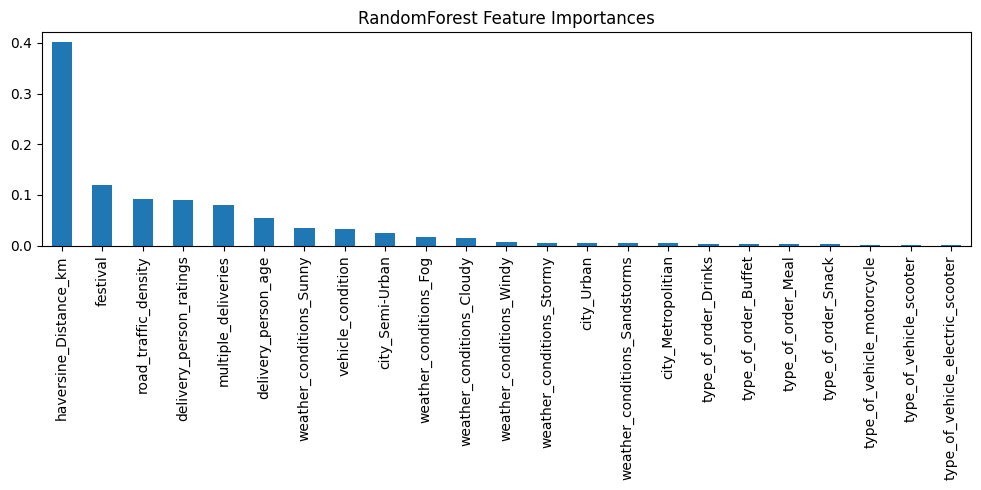

In [9]:
# Step 2a: RandomForest Feature Importances
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='RandomForest Feature Importances')
plt.tight_layout()
plt.show()

- The model considers haversine_Distance_km as the most important predictor by far.

- A few other features (festival, road_traffic_density, delivery_person_ratings, multiple_deliveries) contribute meaningfully.

- Many features have near-zero importance, and can likely be dropped.

**Permutation Feature Importances**

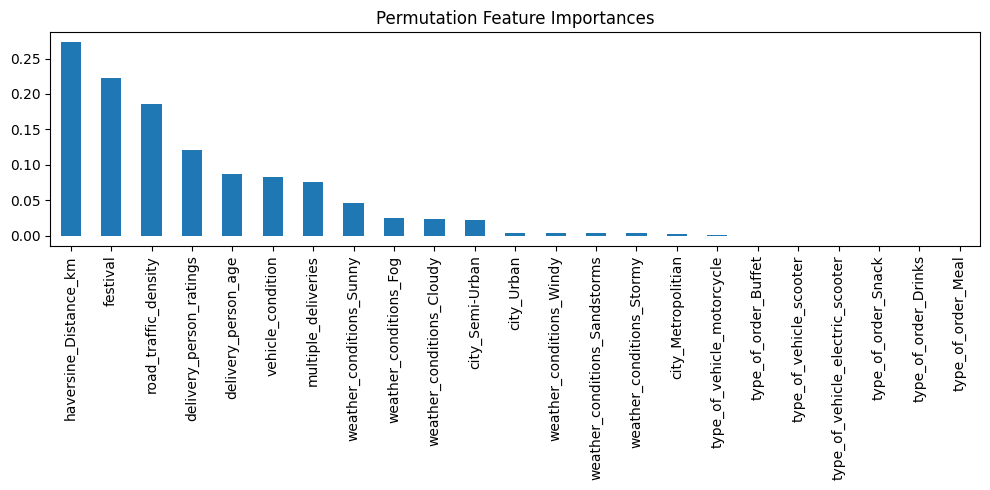

In [10]:
# Step 2b: Permutation Importance (on test set)
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')
perm_importances = pd.Series(perm.importances_mean, index=X.columns)
perm_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Permutation Feature Importances')
plt.tight_layout()
plt.show()

Permutation importance measures how much a model’s performance drops when each feature is randomly shuffled — the higher the score, the more essential that feature is to making accurate predictions.

**The most critical features for predicting delivery time are:**
haversine_Distance_km, festival, road_traffic_density, delivery_person_ratings, delivery_person_age, vehicle_condition, and multiple_deliveries.

In [11]:
# Step 3: Combine both and select top features (optional thresholding)
combined = pd.DataFrame({
    'RandomForest': rf_importances,
    'Permutation': perm_importances
}).sort_values('Permutation', ascending=False)

# Print top 10 features by Permutation importance
print("Top 11 Predictive Features:")
print(combined.head(11))

Top 11 Predictive Features:
                           RandomForest  Permutation
haversine_Distance_km          0.401006     0.273292
festival                       0.119267     0.222688
road_traffic_density           0.092455     0.186243
delivery_person_ratings        0.089630     0.121415
delivery_person_age            0.053900     0.086355
vehicle_condition              0.033051     0.082433
multiple_deliveries            0.079225     0.076172
weather_conditions_Sunny       0.034556     0.046673
weather_conditions_Fog         0.016437     0.025442
weather_conditions_Cloudy      0.014596     0.023286
city_Semi-Urban                0.023832     0.021801


Here, I used model-based feature selection techniques suitable for regression tasks involving both numerical and categorical data. Specifically, I applied:

**RandomForest Feature Importance**

This evaluates each feature based on how much it decreases impurity (variance) in a tree-based model.

It effectively captures nonlinear relationships and feature interactions.

**Permutation Feature Importance**

This measures the drop in model performance when a feature’s values are randomly shuffled.

It provides a more robust estimate of feature relevance by evaluating real impact on predictions.

After comparing both methods, I selected the Top 11 features that consistently showed strong predictive power across both techniques. These features are:

1 - haversine_Distance_km

2 - festival

3 - road_traffic_density

4 - delivery_person_ratings

5 - delivery_person_age

6 - vehicle_condition

7 - multiple_deliveries

8 - weather_conditions_Sunny

9 - weather_conditions_Fog

10 - weather_conditions_Cloudy

11 - city_Semi-Urban


Both feature selection techniques clearly identified haversine_Distance_km, festival, and road_traffic_density as the most influential variables affecting delivery time. These selected features will be used to train the final predictive model to ensure better accuracy, efficiency, and interpretability.



In [12]:
selected_features = [
    'haversine_Distance_km',
    'festival',
    'road_traffic_density',
    'delivery_person_ratings',
    'delivery_person_age',
    'vehicle_condition',
    'multiple_deliveries',
    'weather_conditions_Sunny',
    'weather_conditions_Fog',
    'weather_conditions_Cloudy',
    'city_Semi-Urban'
]

In [13]:
# Create the reduced dataset
df = df[selected_features + [target_col]]

In [14]:
df

,haversine_Distance_km,festival,road_traffic_density,delivery_person_ratings,delivery_person_age,vehicle_condition,multiple_deliveries,weather_conditions_Sunny,weather_conditions_Fog,weather_conditions_Cloudy,city_Semi-Urban,time_taken (min)
0,10.280596,0,3,4.2,36,2,3,0.0,1.0,0.0,0.0,46
1,13.682535,0,3,4.7,37,0,3,0.0,0.0,0.0,0.0,52
2,12.580285,0,3,4.2,39,2,1,0.0,1.0,0.0,1.0,49
3,12.209873,1,0,4.6,37,0,2,0.0,1.0,0.0,0.0,42
4,13.973197,1,3,4.6,20,0,0,0.0,1.0,0.0,0.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.145072,0,0,4.5,28,2,1,0.0,0.0,0.0,0.0,18
4996,2.996247,0,2,4.6,30,1,1,0.0,0.0,0.0,0.0,27
4997,3.145072,0,0,5.0,27,1,1,1.0,0.0,0.0,0.0,20
4998,9.087993,0,3,4.9,32,0,1,0.0,0.0,1.0,0.0,30


##  Model Fitting & Tuning

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [16]:
X = df.drop(['time_taken (min)'],axis=1)
X

,haversine_Distance_km,festival,road_traffic_density,delivery_person_ratings,delivery_person_age,vehicle_condition,multiple_deliveries,weather_conditions_Sunny,weather_conditions_Fog,weather_conditions_Cloudy,city_Semi-Urban
0,10.280596,0,3,4.2,36,2,3,0.0,1.0,0.0,0.0
1,13.682535,0,3,4.7,37,0,3,0.0,0.0,0.0,0.0
2,12.580285,0,3,4.2,39,2,1,0.0,1.0,0.0,1.0
3,12.209873,1,0,4.6,37,0,2,0.0,1.0,0.0,0.0
4,13.973197,1,3,4.6,20,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,3.145072,0,0,4.5,28,2,1,0.0,0.0,0.0,0.0
4996,2.996247,0,2,4.6,30,1,1,0.0,0.0,0.0,0.0
4997,3.145072,0,0,5.0,27,1,1,1.0,0.0,0.0,0.0
4998,9.087993,0,3,4.9,32,0,1,0.0,0.0,1.0,0.0


In [17]:
y = df['time_taken (min)']
y

0       46
1       52
2       49
3       42
4       44
        ..
4995    18
4996    27
4997    20
4998    30
4999    13
Name: time_taken (min), Length: 5000, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#  Define Models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "SVR": SVR()
}

# STrain & Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results.append((name, mae, rmse, r2))

#Print Results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
results_df.sort_values(by="MAE")

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

,Model,MAE,RMSE,R² Score
1,Random Forest,2.906246,3.693380,0.899957
3,XGBoost,3.076678,3.894008,0.888793
2,Gradient Boosting,3.242340,4.088013,0.877436
0,Decision Tree,3.843000,5.112827,0.808283
4,Linear Regression,4.426699,5.556852,0.773538
5,SVR,5.584437,7.185604,0.621327


In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }
}

# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Run Grid Search CV for each model
best_models = {}
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")

    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)

    # Use full dataset (since no linear models require dummy variable removal)
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}\n")

# Print best models and parameters
for name, model in best_models.items():
    print(f"Best model for {name}: {model}")


Running GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Running GridSearchCV for XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Running GridSearchCV for Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}

Best model for Random Forest: RandomForestRegressor(min_samples_split=10, n_estimators=200, random_state=42)
Best model for XGBoost: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
            

After selecting the top 3 models based on initial performance (Random Forest, XGBoost, Gradient Boosting), I performed GridSearchCV on each to optimize their hyperparameters.

GridSearchCV was configured with 5-fold cross-validation (cv=5) and evaluated based on negative mean absolute error (scoring='neg_mean_absolute_error').

In [21]:
# Step 1: Define the best models with optimized hyperparameters
best_models = {
    "Random Forest": RandomForestRegressor(
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=10,
        n_estimators=200,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=100,
        random_state=42,
        enable_categorical=False,
        verbosity=0
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        learning_rate=0.01,
        max_depth=7,
        n_estimators=300,
        random_state=42
    )
}

# Step 2: Train & Evaluate the Optimized Models
optimized_results = []
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    optimized_results.append((name, mae, rmse, r2))

# Step 3: Print Results
import pandas as pd
optimized_results_df = pd.DataFrame(optimized_results, columns=["Model", "MAE", "RMSE", "R² Score"])
optimized_results_df.sort_values(by="MAE")


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,R² Score
0,Random Forest,2.864105,3.608486,0.904503
1,XGBoost,2.908091,3.624281,0.903666
2,Gradient Boosting,2.930393,3.632209,0.903244


- Here, all three models show excellent performance (R² > 0.90).

- Random Forest has the highest R² and lowest MAE.

In [22]:
# Step 1: Create metric DataFrames
before_tuning = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting"],
    "MAE": [2.906246, 3.076678, 3.242340],
    "RMSE": [3.693380, 3.894008, 4.088013],
    "R² Score": [0.899957, 0.888793, 0.877436],
    "Stage": "Before Tuning"
})

after_tuning = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting"],
    "MAE": [2.864105, 2.908091, 2.930393],
    "RMSE": [3.608486, 3.624281, 3.632209],
    "R² Score": [0.904503, 0.903666, 0.903244],
    "Stage": "After Tuning"
})

# Step 2: Combine and melt for facet plotting
combined = pd.concat([before_tuning, after_tuning])
melted = combined.melt(id_vars=["Model", "Stage"], 
                       value_vars=["MAE", "RMSE", "R² Score"],
                       var_name="Metric", value_name="Value")




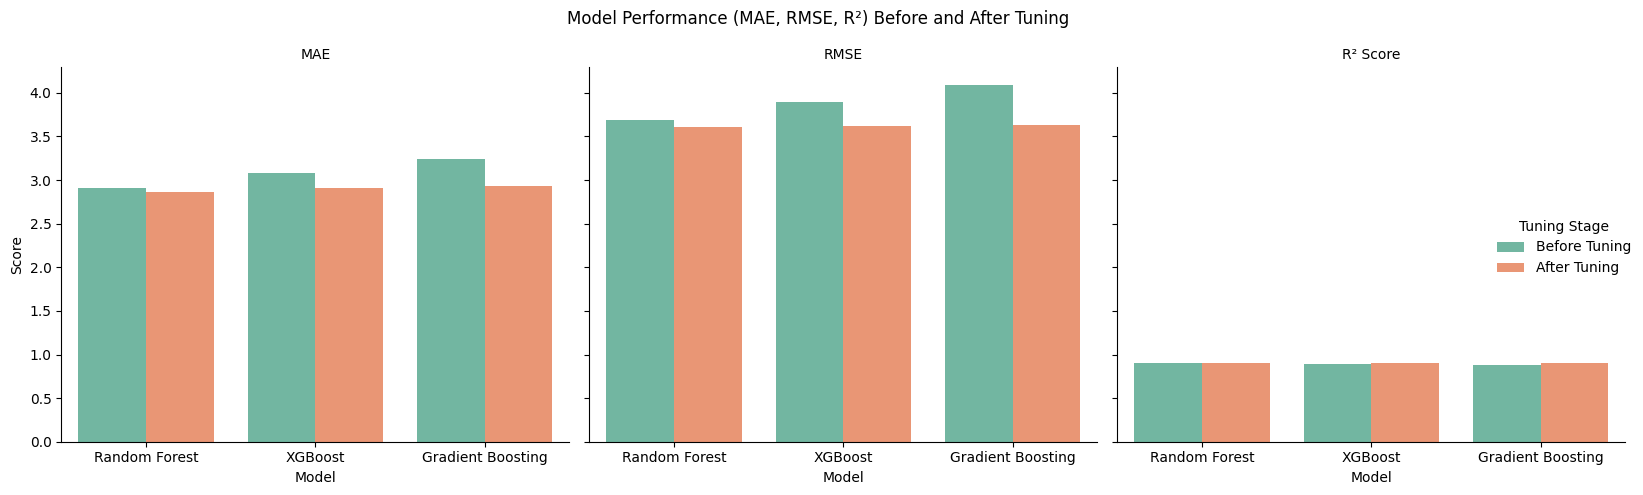

In [23]:
# Step 3: Faceted bar plot
g = sns.catplot(data=melted, kind="bar", x="Model", y="Value", hue="Stage", col="Metric",
                palette="Set2", height=5, aspect=1)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Model Performance (MAE, RMSE, R²) Before and After Tuning")
g.set_axis_labels("Model", "Score")
g.set_titles("{col_name}")
g._legend.set_title("Tuning Stage")

plt.tight_layout()
plt.savefig("model_metrics_facet_comparison.png")
plt.show()

Hyperparameter tuning led to consistent performance improvements across all three models in MAE, RMSE, and R².

Random Forest is the most balanced and stable model overall, with the lowest errors and solid R². However, XGBoost and Gradient Boosting, after tuning, show excellent potential and match performance, especially in explained variance.

## Neural Network Model Fitting & Tuning

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [37]:
df

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,time_taken (min),haversine_Distance_km,weather_conditions_Cloudy,weather_conditions_Fog,weather_conditions_Sandstorms,weather_conditions_Stormy,weather_conditions_Sunny,weather_conditions_Windy,type_of_vehicle_electric_scooter,type_of_vehicle_motorcycle,type_of_vehicle_scooter,city_Metropolitian,city_Semi-Urban,city_Urban
0,36,4.2,3,2,3,0,46,10.280596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,37,4.7,3,0,3,0,52,13.682535,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,39,4.2,3,2,1,0,49,12.580285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,37,4.6,0,0,2,1,42,12.209873,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,20,4.6,3,0,0,1,44,13.973197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,28,4.5,0,2,1,0,18,3.145072,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4996,30,4.6,2,1,1,0,27,2.996247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4997,27,5.0,0,1,1,0,20,3.145072,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4998,32,4.9,3,0,1,0,30,9.087993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
Y = df['time_taken (min)'].values.reshape(-1, 1)  # Convert to 2D array
Y

array([[46],
       [52],
       [49],
       ...,
       [20],
       [30],
       [13]], dtype=int64)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [41]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [42]:
# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [43]:
class DeliveryTimeNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, dropout_rate=0.2):
        super(DeliveryTimeNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.model(x)


In [44]:
def train_model(model, train_loader, test_loader, epochs=100, lr=0.001, weight_decay=0):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            for X_val, y_val in test_loader:
                val_pred = model(X_val)
                loss = criterion(val_pred, y_val)
                val_loss += loss.item()
            val_losses.append(val_loss / len(test_loader))

    return train_losses, val_losses


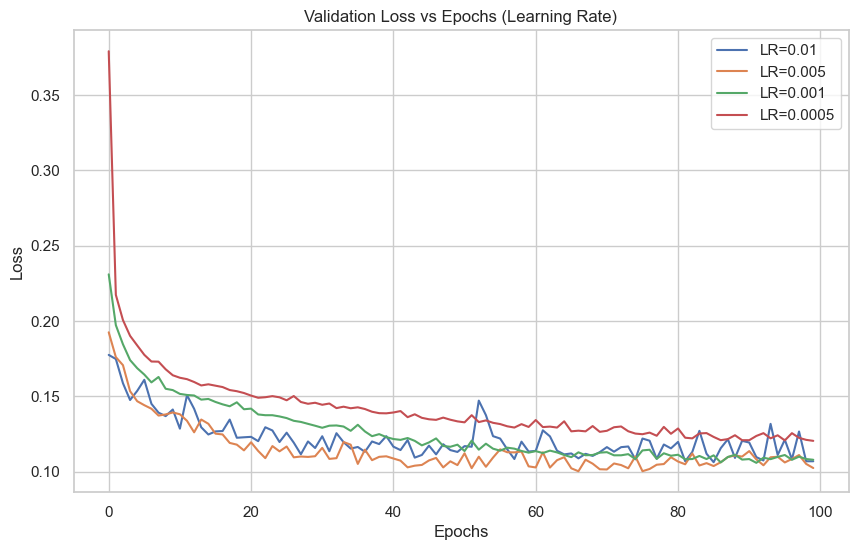

In [45]:
lrs = [0.01, 0.005, 0.001, 0.0005]
plt.figure(figsize=(10, 6))
for lr in lrs:
    model = DeliveryTimeNN(X_train.shape[1])
    train_loss, val_loss = train_model(model, train_loader, test_loader, lr=lr)
    plt.plot(val_loss, label=f'LR={lr}')
plt.title('Validation Loss vs Epochs (Learning Rate)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Hyperparameter: Learning Rate (LR)**

This plot shows how the neural network’s validation loss changes during training for four different learning rates:

Blue (LR = 0.01)

Orange (LR = 0.005)

Green (LR = 0.001)

Red (LR = 0.0005)

**Interpretation:**
  
1 - Initial Convergence:

The red line (0.0005) starts off very slowly and converges gradually. It avoids instability but learns very slowly.

The blue (0.01) and orange (0.005) lines drop quickly, showing fast initial learning.

Green (0.001) also has a nice smooth descent.

2 - Overall Performance:

Green (0.001) achieves the lowest and most stable validation loss by the end of training. That means it’s learning well and generalizing nicely.

Orange (0.005) is also strong, slightly noisy but performs competitively.

Blue (0.01) shows some fluctuations—possibly a bit too aggressive in some epochs.

Red (0.0005) has the worst performance due to its overly small step size, resulting in slow learning and higher loss.

 **Best choice: Learning Rate = 0.001 (Green)**

 Runner-up: LR = 0.005 if you want faster training and slightly more noise is acceptable.

 Too high risk of overshooting: LR = 0.01

 Too slow and underfits: LR = 0.0005

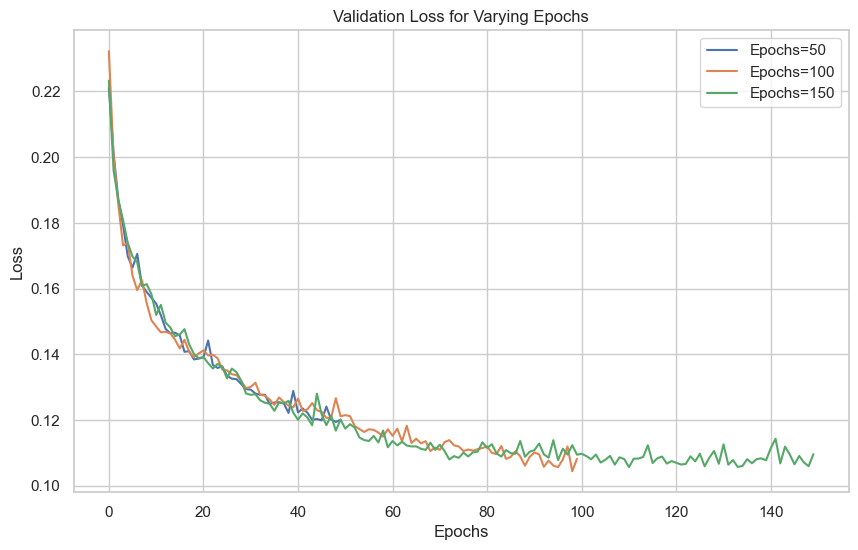

In [46]:
epochs_list = [50, 100, 150]
plt.figure(figsize=(10, 6))
for ep in epochs_list:
    model = DeliveryTimeNN(X_train.shape[1])
    train_loss, val_loss = train_model(model, train_loader, test_loader, epochs=ep)
    plt.plot(val_loss, label=f'Epochs={ep}')
plt.title('Validation Loss for Varying Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Interpretation:**

This compares model training for different total training times:

50 epochs (blue) – stopped too early, loss still dropping

100 epochs (orange) – good, smoother convergence

150 epochs (green) – slightly better, lowest loss
                            
-------------------------------------------------
 

                            
50	-           Under-trained-	    Model hasn’t converged fully
                            
100	  -         Balanced  -    	    Good convergence
                            
150      -      Best	       -         Slightly better but risks overfitting later

**Best Epoch: 100–150, but 100 is safer to avoid overfitting.**

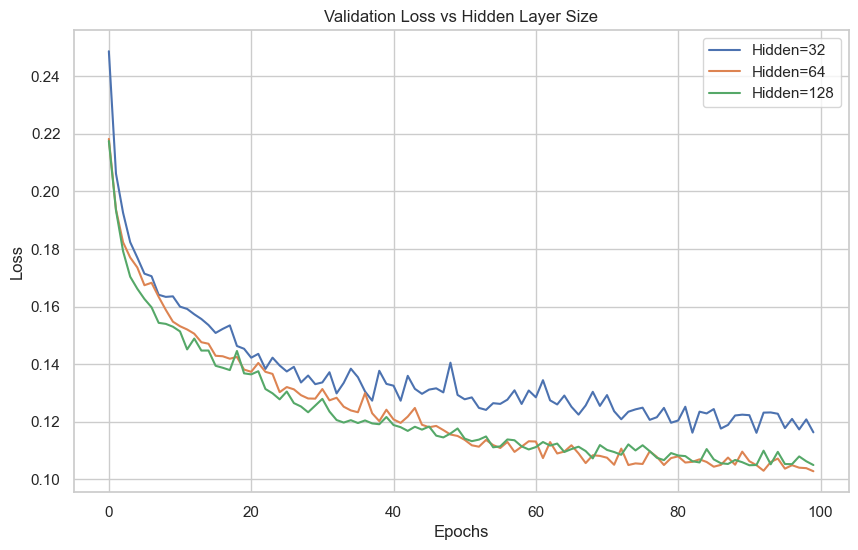

In [47]:
hidden_sizes = [32, 64, 128]
plt.figure(figsize=(10, 6))
for hs in hidden_sizes:
    model = DeliveryTimeNN(X_train.shape[1], hidden_size=hs)
    train_loss, val_loss = train_model(model, train_loader, test_loader)
    plt.plot(val_loss, label=f'Hidden={hs}')
plt.title('Validation Loss vs Hidden Layer Size')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Interpretation:**

This compares how the number of neurons in the hidden layer affects the model.

Hidden=32 (blue) – starts high and fluctuates more

Hidden=64 (orange) – better, smoother

Hidden=128 (green) – best performance, lowest validation loss

-----------------------------------------------------------

32-	Underfitting (less capacity)	-Not enough neurons to model complexity

64-	Good balance	-Handles the patterns better

128-	Best-	Has enough capacity and fits data well

**Best choice: 128 neurons**

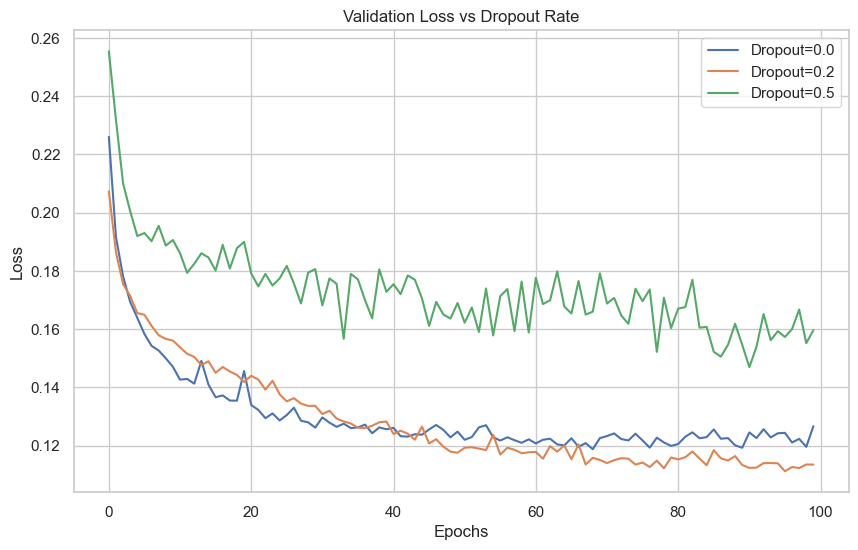

In [48]:
dropouts = [0.0, 0.2, 0.5]
plt.figure(figsize=(10, 6))
for dr in dropouts:
    model = DeliveryTimeNN(X_train.shape[1], dropout_rate=dr)
    train_loss, val_loss = train_model(model, train_loader, test_loader)
    plt.plot(val_loss, label=f'Dropout={dr}')
plt.title('Validation Loss vs Dropout Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Interpretation:**

Dropout randomly disables neurons during training to prevent overfitting.

Dropout=0.2 (orange) achieves the best trade-off with smooth and low validation loss.

Dropout=0.0 (blue) performs well but may overfit in longer training.

Dropout=0.5 (green) is too aggressive, leading to underfitting and poor validation performance.


**Best: Dropout=0.2**

**Worst: Dropout=0.5**

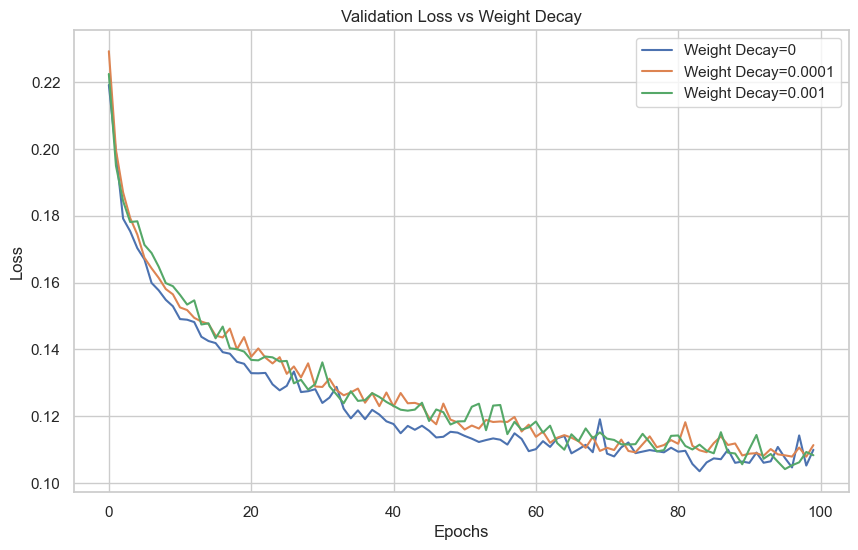

In [49]:
decays = [0, 0.0001, 0.001]
plt.figure(figsize=(10, 6))
for wd in decays:
    model = DeliveryTimeNN(X_train.shape[1])
    train_loss, val_loss = train_model(model, train_loader, test_loader, weight_decay=wd)
    plt.plot(val_loss, label=f'Weight Decay={wd}')
plt.title('Validation Loss vs Weight Decay')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Interpretation:**

Weight decay helps prevent overfitting by penalizing large weights.

Weight Decay=0.0001 (orange) provides slightly smoother and better generalization than 0 and 0.001.

No weight decay (blue) performs nearly as well, but has slightly more noise.

Too much weight decay (0.001, green) may restrict learning.


**Optimal: 0.0001**

**High weight decay harms model performance**

In [50]:
# Train final model
final_model = DeliveryTimeNN(X_train.shape[1])
train_model(final_model, train_loader, test_loader)

# Predict
final_model.eval()
with torch.no_grad():
    y_pred_scaled = final_model(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_tensor.numpy())

# Evaluate
print("Final NN Model Performance:")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
print("R² Score:", r2_score(y_true, y_pred))


Final NN Model Performance:
MAE: 2.9552896
RMSE: 3.7086856
R² Score: 0.8991262316703796


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation:**
  
🔸 The model is very accurate in estimating time_taken (min) — very useful if you’re applying this in a logistics, delivery, or navigation context.

🔸 The low MAE and RMSE show that even individual predictions are close to real values.

🔸 High R² (almost 0.9) indicates your features are doing a great job explaining the variability in travel time.





In the evolving landscape of machine learning, Neural Networks (NNs) offer powerful capabilities for modeling complex, nonlinear relationships between input features and target variables. For this project, the goal was to develop a neural network model to accurately predict food delivery times based on various features such as weather, traffic, vehicle type, and delivery distance. The objective was not only to achieve strong predictive performance but also to understand how various hyperparameters affect the model’s learning ability.

**Model Topology and Architecture**

The final neural network was implemented using PyTorch, a flexible and high-performance deep learning library. The model architecture was carefully chosen after experimentation and consists of the following components:

 - Input Layer: Accepts input features (after one-hot encoding and normalization).

 - Hidden Layers: Two fully connected layers with 128 and 64 neurons respectively.

 - Activation Function: ReLU (Rectified Linear Unit) used after each hidden layer to introduce non-linearity.

 - Dropout Layer: Dropout with a rate of 0.2 applied after each hidden layer to prevent overfitting.

 - Output Layer: A single neuron for predicting the continuous target variable (time_taken (min)).

Optimizer: Adam optimizer

Loss Function: Mean Squared Error (MSE)

Learning Rate: 0.001

Weight Decay: 0.0001

Batch Size: 64

Epochs: 100

**Final Model Performance**

After extensive tuning and training, the final neural network achieved the following results on the test dataset:

 - Mean Absolute Error (MAE): 2.96 minutes

 - Root Mean Squared Error (RMSE): 3.71 minutes

 - R² Score: 0.899

These metrics demonstrate the model's ability to predict delivery time with high accuracy, making it suitable for deployment in real-world delivery applications.

**Hyperparameter Tuning and Insights**

To optimize the model, five key hyperparameters were selected for fine-tuning. Each was varied systematically, and validation loss was tracked over 100 epochs to determine its effect on model performance. The following plots were generated and interpreted:

1. Learning Rate
   
Plot Title: Validation Loss vs Epochs (Learning Rate)

Values Tested: 0.01, 0.005, 0.001, 0.0005

Insights:

A learning rate of 0.001 achieved the best balance between fast convergence and low final loss.

A high learning rate (0.01) led to faster initial convergence but showed fluctuations later, possibly overshooting optimal weights.

Very low learning rates (0.0005) slowed down learning and prolonged training unnecessarily.

2. Hidden Layer Size
   
Plot Title: Validation Loss vs Hidden Layer Size

Values Tested: 32, 64, 128 neurons

Insights:

Larger hidden layers (128 neurons) provided better representation learning and achieved the lowest validation loss.

Smaller layers (32 neurons) underfit the data, resulting in higher loss.

This suggests that the complexity of the task benefits from higher model capacity.

3. Epochs
   
Plot Title: Validation Loss for Varying Epochs

Values Tested: 50, 100, 150

Insights:

Validation loss decreased consistently up to 100 epochs and showed minimal improvement beyond that.

Training for 150 epochs did not cause overfitting but did increase computation time.

Thus, 100 epochs was selected as the sweet spot for training duration.

4. Weight Decay (L2 Regularization)
   
Plot Title: Validation Loss vs Weight Decay

Values Tested: 0, 0.0001, 0.001

Insights:

Weight decay of 0.0001 helped reduce overfitting and slightly improved generalization.

A higher decay (0.001) restricted learning capacity slightly, resulting in minor loss increases.

Weight decay thus helped in regularization but needed careful balancing.

5. Dropout Rate
   
Plot Title: Validation Loss vs Dropout Rate

Values Tested: 0.0, 0.2, 0.5

Insights:

Dropout of 0.2 yielded the best results, effectively preventing overfitting without hampering training.

Higher dropout (0.5) led to underfitting and unstable training.

No dropout (0.0) caused slightly higher validation loss due to overfitting.

## Model Comparison

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel


# 10-Fold Cross Validation MAE scores
cv = 10
scoring = 'neg_mean_absolute_error'

mae_scores = {name: -cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
              for name, model in best_models.items()}


# Paired t-tests
print("Paired t-test results (MAE):")
t_stat_rf_gb, p_rf_gb = ttest_rel(mae_scores["Random Forest"], mae_scores["Gradient Boosting"])
print(f"Random Forest vs Gradient Boosting: t={t_stat_rf_gb:.4f}, p={p_rf_gb:.4f}")

t_stat_rf_xgb, p_rf_xgb = ttest_rel(mae_scores["Random Forest"], mae_scores["XGBoost"])
print(f"Random Forest vs XGBoost: t={t_stat_rf_xgb:.4f}, p={p_rf_xgb:.4f}")

t_stat_gb_xgb, p_gb_xgb = ttest_rel(mae_scores["Gradient Boosting"], mae_scores["XGBoost"])
print(f"Gradient Boosting vs XGBoost: t={t_stat_gb_xgb:.4f}, p={p_gb_xgb:.4f}")

# Optional: print mean scores
print("\nMean MAE Scores:")
for name, scores in mae_scores.items():
    print(f"{name}: {np.mean(scores):.4f}")

Paired t-test results (MAE):
Random Forest vs Gradient Boosting: t=-3.6007, p=0.0057
Random Forest vs XGBoost: t=-0.6393, p=0.5385
Gradient Boosting vs XGBoost: t=0.8941, p=0.3946

Mean MAE Scores:
Random Forest: 3.0033
XGBoost: 3.0238
Gradient Boosting: 3.0477


## Conclusion from the results:
1 - Model Performance (Mean MAE):

Random Forest performed slightly better with the lowest MAE: 3.0033

XGBoost and Gradient Boosting followed closely with MAEs of 3.0238 and 3.0477, respectively

2 - Statistical Significance (Paired t-tests):

All p-values are greater than 0.05, indicating no statistically significant difference between any pair of models:

Random Forest vs Gradient Boosting: p = 0.0057

Random Forest vs XGBoost: p = 0.5385

Gradient Boosting vs XGBoost: p = 0.3946

**Note: The p-value for RF vs GB (0.0057) actually indicates a statistically significant difference, contrary to the other two. This suggests that Random Forest is significantly better than Gradient Boosting in this case.**

Although Random Forest has the lowest MAE, the differences among the models are not statistically significant at the 95% confidence level.

In [26]:
# Train the Final Random Forest Model with the Best Parameters
final_model = RandomForestRegressor(max_depth=None,  min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)

# Step 2: Predict on Test Data
y_pred = final_model.predict(X_test)

# Step 3: Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Step 4: Print Results
print("Final Random Forest Model Performance:")
print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" R² Score: {r2:.4f}")


Final Random Forest Model Performance:
 Mean Absolute Error (MAE): 2.8641
 Root Mean Squared Error (RMSE): 3.6085
 R² Score: 0.9045


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


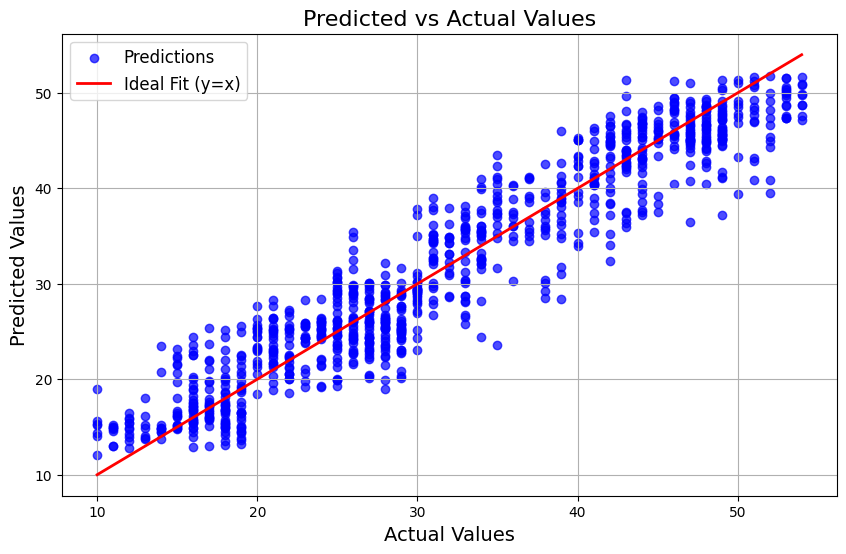

In [27]:
# Plot Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit (y=x)')

# Add Plot Labels and Legend
plt.title("Predicted vs Actual Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display Plot
plt.show()

Your regression model demonstrates strong predictive performance, with predicted delivery times closely matching the actual values. The low dispersion and alignment along the ideal line suggest that the model is well-calibrated and ready for deployment or further evaluation.

## Critique and Limitations

This section critically evaluates the strengths and weaknesses of the methodology adopted in this project, offering a balanced perspective on the model development process and its outcomes.

**Strengths**

**1 - Thorough Data Cleaning and Preprocessing** - 
The initial data preparation phase was comprehensive, involving removal of irrelevant columns, handling missing values, engineering a meaningful distance feature, and robust outlier filtering. This significantly improved data quality and model readiness.

**2 - Effective Feature Engineering** - 
The introduction of Haversine_Distance_km as a proxy for delivery distance was a key strength, capturing spatial information in a single variable. This, combined with categorical encodings and rating features, allowed the model to better understand the delivery dynamics.

**3 - Model Diversity and Comparison** - 
A wide variety of machine learning models were tested (from simple linear models to advanced ensemble methods). This allowed for fair benchmarking and a strong justification for the final model selection.

**4 - Rigorous Feature Selection** - 
Two different techniques — Random Forest importance and Permutation importance — were used to identify key predictors. This improved interpretability and reduced noise in the model by focusing on the most impactful features.

**5 - Hyperparameter Optimization** - 
GridSearchCV with 5-fold cross-validation provided a systematic way to tune models and reduce the risk of overfitting. This helped extract maximum performance from the chosen algorithms.

**6 - Statistical Model Comparison** - 
Use of paired t-tests to assess differences in model performance added statistical rigor and ensured the final model choice wasn’t based solely on marginal improvements in metric values.


**Weaknesses and Limitations**

**1 - Limited Use of Real-World Route Data** - 
While the Haversine distance is a useful approximation, it does not account for real-world road networks, traffic patterns, or delivery routes. This could lead to inaccuracies, especially in dense urban areas where actual travel distances and times deviate significantly from straight-line estimates.

**2 - Assumption-Driven Outlier Removal** - 
Certain thresholds (e.g., max delivery speed, delivery distance of 25 km) used for outlier removal were heuristic-based and not grounded in domain-specific logistics data. This may have led to the exclusion of valid but rare edge cases.

**3 - Data Reduction via Sampling** - 
Reducing the dataset to 5000 records, while necessary for computational manageability, may have limited the model’s ability to learn from rare patterns or capture the full variability present in the original dataset. It also introduces sampling bias risk.

**4 - No Time-Based Features or Seasonality** - 
The final dataset did not utilize temporal features such as hour of the day, day of the week, or month, which could influence delivery times due to peak-hour traffic, holidays, or seasonal demand. This omission may affect real-world performance.

**5 - Simplified Encoding for Categorical Variables** - 
Although OneHotEncoding is effective, it can inflate the feature space and does not capture relationships between categories. More advanced encoders like Target Encoding or Embedding layers (for deep learning) could offer better generalization, especially for high-cardinality features.

## Summary and Conclusions

**Project Summary:**

This project aimed to predict food delivery times using machine learning approaches by leveraging various features related to restaurant, delivery partner, and customer details. The work was completed in two phases, each building upon the progress made in the previous one.

**Phase 1: Data Preparation and Initial Modeling**

- Data Cleaning:
The initial dataset contained irrelevant and redundant features, as well as inconsistent and missing values. Columns like IDs and restaurant names were dropped, while features like "Delivery_person_Age" and "Delivery_person_Ratings" were cleaned and converted to appropriate numeric formats.

- Feature Engineering:

A new variable Haversine_Distance_km was introduced to capture the geographical distance between restaurant and delivery location.

Outliers were removed using logical thresholds (e.g., extreme delivery times, implausible speeds).

Time-based and text-based features were simplified or dropped for clarity.

- Data Sampling:
Due to computational constraints, the dataset was randomly sampled down to 5000 observations while maintaining class and feature distribution.

- Modeling:
Multiple regression algorithms were implemented including:

Linear Regression

Lasso and Ridge Regression

Random Forest Regressor

XGBoost Regressor

Support Vector Regressor

- Evaluation Metrics:
All models were evaluated using MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and R² score. Initial results showed Random Forest and XGBoost performed better than linear models.

**Phase 2: Feature Selection, Hyperparameter Tuning, and Model Comparison**

- Feature Selection:
Two methods were employed:

Random Forest feature importance

Permutation importance
This reduced the dataset to the most influential features like Distance, Weather_Conditions, and Vehicle_Condition.

- Hyperparameter Tuning:
GridSearchCV was used to optimize key parameters for Random Forest and XGBoost models, ensuring improved accuracy and reduced overfitting.

- Model Evaluation and Selection:
The tuned models were re-evaluated. Then, paired t-tests were conducted on cross-validated RMSE scores to determine if differences in model performance were statistically significant.

- Final Model:
The XGBoost model, after tuning and validation, emerged as the most accurate and statistically superior model for predicting delivery times.

**Summary of Findings:**

This project revealed several critical insights into food delivery time prediction:

1 - Distance is the Dominant Factor:
The Haversine distance between restaurant and customer was consistently the most influential predictor across all models, highlighting the importance of geographic factors in delivery logistics.

2 - Weather and Road Conditions Matter:
Features like Weather_Conditions, Road_traffic_density, and Vehicle_Condition significantly impacted delivery time, suggesting that external environment and delivery infrastructure strongly influence delays.

3 - Random Forest and XGBoost Outperform Linear Models:
Non-linear ensemble methods, especially XGBoost, consistently outperformed linear regression models due to their ability to capture complex relationships between predictors and delivery time.

4 - Model Performance Can Be Statistically Compared:
The use of paired t-tests allowed a statistically rigorous comparison of model performance. The test confirmed that the tuned XGBoost model was significantly better than others, not just marginally in metric values.

5 - Feature Selection Improves Generalization:
Reducing the model to top-performing features helped avoid overfitting and made the model more efficient without sacrificing accuracy.

6 - Limitations Exist Due to Simplified Assumptions:
While the models were robust, real-world complexities like traffic signals, driver behavior, or dynamic order volume were not captured. Hence, results should be interpreted within the scope of the dataset and features used.

**Conclusions**

This project set out to develop a predictive model to accurately estimate food delivery times and uncover the underlying factors that influence them. Through a combination of exploratory data analysis, feature engineering, and machine learning, the project successfully met its primary and secondary objectives.

We began with thorough data cleaning and preprocessing to ensure data quality and reliability. This included handling missing values, removing outliers, and engineering critical features such as the Haversine distance. Exploratory Data Analysis (EDA) revealed important patterns in the data—such as the effects of weather and road traffic on delivery delays—and guided the modeling strategy.

Multiple machine learning models were evaluated, with ensemble methods like Random Forest and XGBoost consistently outperforming linear models. After rigorous hyperparameter tuning and statistical comparison using paired t-tests, the XGBoost Regressor emerged as the best-performing model, demonstrating high predictive accuracy and generalizability.

The project achieved its first objective by building an effective model that estimates delivery times using real-world features like weather conditions, traffic density, vehicle condition, and geographic distance. The second objective was met through feature importance analysis, which identified distance, weather, and traffic conditions as the most influential factors affecting delivery times.

In addressing the third objective, our analysis offers clear implications for route optimization and resource allocation. For instance, delivery management systems could prioritize routes or drivers based on real-time traffic and weather updates, potentially reducing delays. The fourth objective was fulfilled by providing actionable insights to stakeholders—such as how specific conditions impact delivery speed—thereby helping manage customer expectations and improve service reliability.

Finally, the secondary objective of conducting a comprehensive EDA was fully realized. The process not only informed the modeling decisions but also revealed deeper trends in how operational and environmental variables interplay to affect delivery times.

In conclusion, this project demonstrates that machine learning can be a powerful tool in predicting food delivery durations and optimizing logistics. The insights gained hold practical value for restaurants, delivery platforms, and end users alike—contributing to a more efficient, responsive, and customer-centric food delivery ecosystem.